#### Q1. 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.

고객별 속성 데이터 

- id: 1번 ~ 100번 일련번호
- gender: 0, 1 정수, 난수 생성
- age: 10 ~ 80 사이 정수 난수를 생성하고 범주화하여 age_cat 파생
- region: 1 ~ 5 사이 난수 생성

거래 데이터 

- id: 1번 ~ 100번 일련번호 (관측치 1000개)
- product: 고급제품(hpd), 일반제품(ldp)로 구분
- price: 100 ~ 200 사이 정수 난수 생성
- qty: 1 ~ 2 사이 정수 난수 생성
- day: 요일
- date: 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성
- amount: price * qty 로 산출 

#### Q2. df를 수정하여 5가지 이상의 인사이트를 포함한 데이터 셋으로 변환하세요. 

#### Q3. df를 탐색적 분석을 통하여 인사이트를 도출하세요.

In [576]:
import numpy as np
import pandas as pd

pid = np.arange(1,101)
pid = pd.Series(pid)
gender = np.random.randint(2,size=100)
gender = pd.Series(gender)
age = np.random.randint(10,81,100)
age = pd.Series(age)
region = np.random.randint(1,6,100)
region = pd.Series(region)

df = pd.concat([pid,gender,age,region],axis=1)
df.columns=['pid','gender','age','region']
df.head()


,pid,gender,age,region
0,1,0,79,2
1,2,0,27,1
2,3,1,11,4
3,4,1,74,1
4,5,1,73,3


In [577]:
df2 = np.zeros((1000,6))
df2 = pd.DataFrame(df2,columns=['pid','product','price','qty','date','day'])
df2

,pid,product,price,qty,date,day
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0


거래 데이터 

- id: 1번 ~ 100번 일련번호 (관측치 1000개)
- product: 고급제품(hpd), 일반제품(ldp)로 구분
- price: 100 ~ 200 사이 정수 난수 생성
- qty: 1 ~ 2 사이 정수 난수 생성
- day: 요일
- date: 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성
- amount: price * qty 로 산출 

In [578]:
df2['pid'] = np.random.randint(1,101,size=1000)
df2['product'] = np.random.randint(2,size=1000)
df2['price'] = np.random.randint(100,201,size=1000)
df2['qty'] = np.random.randint(1,3,size=1000)
df2['date'] = pd.date_range(start='2020-01-01',end='2021-12-31',periods=1000)
df2['day'] = df2['date'].dt.dayofweek
df2['year'] = df2['date'].dt.year

df2.head()

,pid,product,price,qty,date,day,year
0,70,0,193,2,2020-01-01 00:00:00.000000000,2,2020
1,46,1,141,1,2020-01-01 17:32:15.135135135,2,2020
2,13,1,118,1,2020-01-02 11:04:30.270270270,3,2020
3,24,0,101,1,2020-01-03 04:36:45.405405405,4,2020
4,93,0,200,2,2020-01-03 22:09:00.540540540,4,2020


In [579]:
pdf = df2.drop(['date'],axis=1)
pdf.head()

,pid,product,price,qty,day,year
0,70,0,193,2,2,2020
1,46,1,141,1,2,2020
2,13,1,118,1,3,2020
3,24,0,101,1,4,2020
4,93,0,200,2,4,2020


In [580]:
def price_tran(product,price):
    if product == 0 :
        return price * 50
    else : 
        return price * 10

def qty_tran(product,qty):
    if product == 0 :
        return qty * 100
    else : 
        return qty * 500

pdf['price'] = pdf.apply(lambda x : price_tran(x['product'],x['price']),axis=1)
pdf['qty'] = pdf.apply(lambda x : qty_tran(x['product'],x['qty']),axis=1)
pdf['amount'] = pdf['price'] * pdf['qty']

pdf.head()

,pid,product,price,qty,day,year,amount
0,70,0,9650,200,2,2020,1930000
1,46,1,1410,500,2,2020,705000
2,13,1,1180,500,3,2020,590000
3,24,0,5050,100,4,2020,505000
4,93,0,10000,200,4,2020,2000000


#### Q2. df를 수정하여 5가지 이상의 인사이트를 포함한 데이터 셋으로 변환하세요.

In [581]:
# 월요일, 화요일은 휴일이라서 영업을 하지 않는다
def day_tran(day):
    if day < 2 :
        return None
    else :
        return day

pdf['day'] = pdf.apply(lambda x : day_tran(x['day']),axis=1)
pdf.isnull().sum()
pdf.dropna(axis=0,inplace=True)

In [582]:
pdf.head()

,pid,product,price,qty,day,year,amount
0,70,0,9650,200,2.0,2020,1930000
1,46,1,1410,500,2.0,2020,705000
2,13,1,1180,500,3.0,2020,590000
3,24,0,5050,100,4.0,2020,505000
4,93,0,10000,200,4.0,2020,2000000


In [583]:
# 코로나로 인해 2020년 저가제품 매출이 감소했다
def in1(year,product,qty):
    if (year == 2020) & (product == 1):
        return qty * 0.6
    else :
        return qty

pdf['qty'] = pdf.apply(lambda x : in1(x['year'],x['product'],x['qty']),axis=1)

In [584]:
# 2021년 물가 상승 예정으로 2020년 고가제품 사재기 현상이 발생했다
def in2(year,product,qty):
    if (year == 2020) & (product == 0):
        return qty + (qty * 0.7)
    else :
        return qty

pdf['qty'] = pdf.apply(lambda x : in2(x['year'],x['product'],x['qty']),axis=1)

In [585]:
# 2021년 물가 상승으로 전 품목 물가 상승
def in3(year,price):
    if year == 2021:
        return price + 100
    else :
        return price

pdf['price'] = pdf.apply(lambda x : in3(x['year'],x['price']),axis=1)

In [586]:
# 2021년 반도체 부족으로 고가 제품 판매량이 감소
def in4(year,product,qty):
    if (year == 2021) & (product == 0):
        return qty * 0.5
    else :
        return qty
        
pdf['qty'] = pdf.apply(lambda x : in4(x['year'],x['product'],x['qty']),axis=1)

In [587]:
pdf['amount'] = pdf['price'] * pdf['qty']
pdf.head()

,pid,product,price,qty,day,year,amount
0,70,0,9650.0,340.0,2.0,2020,3281000.0
1,46,1,1410.0,300.0,2.0,2020,423000.0
2,13,1,1180.0,300.0,3.0,2020,354000.0
3,24,0,5050.0,170.0,4.0,2020,858500.0
4,93,0,10000.0,340.0,4.0,2020,3400000.0


## Q. 타이타닉 생존자 예측모델 개발을 위한 Titanic 분석용 데이터셋

#### Titanic data 전처리
- 분석 데이터 : titanic3.csv
- 재사용 가능한 전처리 사용자 함수 작성 하여 전처리
    - Null 값 처리 : Age는 평균나이, 나머지 칼럼은 'N'값으로 변경
    - 불필요한 속성 칼럼 삭제
    - 문자열 칼럼 레이블 인코딩
- 통계적, 시각적 탐색을 통한 다양한 인사이트 도출
- 탐색적 분석을 통한 feature engineering, 파생변수 

#### 컬럼 정보

- survived : 생존여부(1: 생존, 0 : 사망)
- pclass : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)
- name : 승객 이름
- sex : 승객 성별
- age : 승객 나이
- sibsp : 동반한 형제자매, 배우자 수
- parch : 동반한 부모, 자식 수
- ticket : 티켓의 고유 넘버
- fare 티켓의 요금
- cabin : 객실 번호
- embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)
- boat
- body
- home.dest

In [588]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/titanic3.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [589]:
df.drop(['name','ticket','cabin','embarked','boat','body','home.dest'],axis=1,inplace=True)
df.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,1,1,female,29.00,0,0,211.3375
1,1,1,male,0.92,1,2,151.5500
2,1,0,female,2.00,1,2,151.5500
3,1,0,male,30.00,1,2,151.5500
4,1,0,female,25.00,1,2,151.5500


In [590]:
df['age'] = df['age'].fillna(df['age'].mean())
df['fare'] = df['fare'].fillna(df['fare'].mean())
df.isnull().sum()


pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [591]:
from sklearn.preprocessing import LabelEncoder
li = LabelEncoder()
df['sex'] = li.fit_transform(df['sex'])

In [592]:
def age_tran(age):
    if age <= 20 : cat = 1
    elif age <= 30 : cat = 2
    elif age <= 40 : cat = 3
    elif age <= 50 : cat = 4
    elif age <= 60 : cat = 5
    else : cat = 6
    return cat

def fare_tran(a):
    if a == 0 : result = 0
    elif a <= 10 : result = 1
    elif a <= 30 : result = 2
    elif a <= 60 : result = 3
    elif a <= 90 : result = 4
    else : result = 5
    return result

df['age_cat'] = df['age'].apply(age_tran).astype(int)
df['fare_cat'] = df['fare'].apply(fare_tran).astype(int)
df.drop(['fare','age'],axis=1,inplace=True)


<AxesSubplot:>

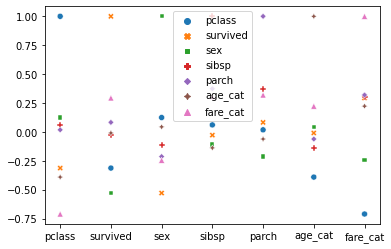

In [593]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df.corr())
# 생존과 상관계수가 높은 컬럼은 fare_cat,parch가 있다
# 여성들의 생존률이 높아 자식과의 연관률이 높다
# age_cat와 fare_cat의 상관관계를 보면 연령이 높을 수록 더 높은 금액을 지불 했다는 것을 알 수 있다

In [594]:
y = df['pclass']
x = df.drop('pclass',axis=1)

In [595]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
y_t_df = y # 종속변수
X_t_df = x # 독립변수

# 독립변수 정규화
# X_t_df = preprocessing.StandardScaler().fit(X_t_df).transform(X_t_df)

# 학습용 데이터와 평가용 데이터를 8:2 혹은 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_t_df, y_t_df, test_size = 0.2,
                                                   random_state = 9) # age fillna = 9 / 84% | drop = 8 / 87%

print(X_train.shape)
print(X_test.shape)


(1047, 6)
(262, 6)


In [596]:
# 모델 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred).round(2)

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test,lr_pred).round(2)

print('rf 정확도:{}, lr 정확도:{}'.format(accuracy_rf,accuracy_lr))

rf 정확도:0.82, lr 정확도:0.82
